In [ ]:
# Problem Statement
# J. C. Nickles receives credit card payments from four regions of the country (West,
# Midwest, East, and South). The average daily value of payments mailed by customers 
# from each region is as follows: the West, $70,000; the Midwest, $50,000; the East, 
# $60,000; the South, $40,000. Nickles must decide where customers should mail their 
# payments. Because Nickles can earn 20% annual interest by investing these revenues, 
# it would like to receive payments as quickly as possible. Nickles is considering 
# setting up operations to process payments (often referred to as lockboxes) in four 
# different cities: Los Angeles, Chicago, New York, and Atlanta. The average number 
# of days (from time payment is sent) until a check clears and Nickles can deposit 
# the money depends on the city to which the payment is mailed, as shown in Table 4. 

# For example, if a check is mailed from the West to Atlanta, it would take an average 
# of 8 days before Nickles could earn interest on the check. The annual cost of running 
# a lockbox in any city is $50,000. 

# Formulate an IP that Nickles can use to minimize the sum of costs due to lost interest 
# and lockbox operations. Assume that each region must send all its money to a single city 
# and that there is no limit on the amount of money that each lockbox can handle.

#EXAMPLE 4: The Lockbox Problem (Page 485 Winston)

In [1]:
# First, import packages
import pandas as pd
from IPython.display import Image 
import gurobipy as gp
from gurobipy import GRB

# Define a gurobipy model for the decision problem
m = gp.Model('lockbox')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-29


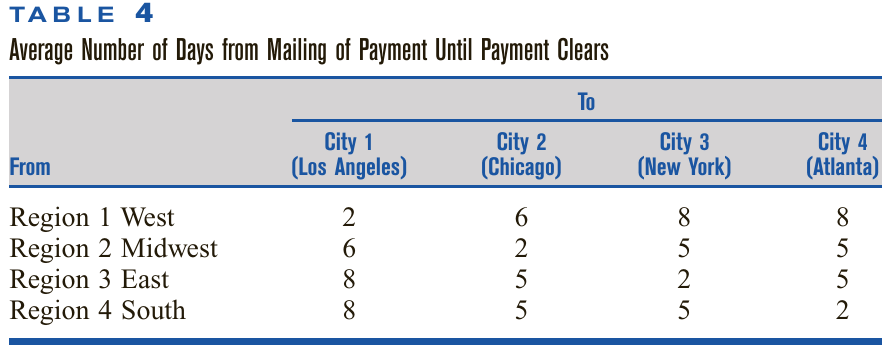

In [2]:
# Table 04: 
Image("lockbox.png", width=450, height=350) 

## Sets and Define Model
Our sets are:
- $C = \{\texttt{'Los Angeles', 'Chicago', 'New York', 'Atlanta'}\} \quad\quad\quad\quad\quad\space\space \texttt{city}$
- $R = \{\texttt{'West', 'Midwest', 'East', 'South'}\} 
\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\space\space \texttt{region}$

To index each set, we'll use the lowercase letter of each set. Letters used for sets and indices are up to you. Typically, capital letters are for sets and corresponding lowercase will be the index. Single letters are used mainly for conciseness.

In [3]:
# Sets C and R, respectively
# When we code sets we can be more descriptive in the name
city = ['Los Angeles','Chicago','New York','Atlanta']
region = ['West','Midwest','East','South']

## Parameters

Parameters of a math optimization problem are values treated as constants in the model and are associated with the decision variables. 

- $OC_c$ is the lockbox operation cost in location $c$, $\forall c \in C \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\space\space$

- $c_{r,c}$ is the annual lost interest cost between region $r$ and city $c$, $\forall r \in R, c \in C \quad\quad\quad$

In [4]:
# Lockbox operating cost
opcost = pd.Series([50,50,50,50], index = city, name = "opcost")
#lb_opcost.to_frame()
opcost

Los Angeles    50
Chicago        50
New York       50
Atlanta        50
Name: opcost, dtype: int64

In [5]:
# Load annual lost interest cost data thorough dictionary command
cost = {    
    ('West', 'Los Angeles'): 28,
    ('West', 'Chicago'): 84,
    ('West', 'New York'): 112,
    ('West', 'Atlanta'): 112,
    ('Midwest', 'Los Angeles'): 60,
    ('Midwest', 'Chicago'): 20,
    ('Midwest', 'New York'): 50,
    ('Midwest', 'Atlanta'): 50,
    ('East', 'Los Angeles'): 96,
    ('East', 'Chicago'): 60,
    ('East', 'New York'): 24,
    ('East', 'Atlanta'): 60,
    ('South', 'Los Angeles'): 64,
    ('South', 'Chicago'): 40,
    ('South', 'New York'): 40,
    ('South', 'Atlanta'): 16
}

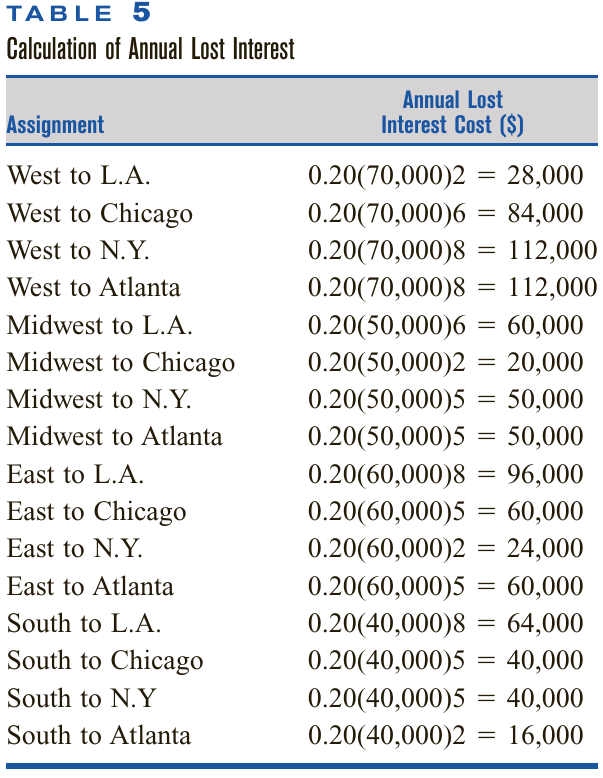

In [6]:
# Table 05: 
Image("lostinterest.png", width=350, height=450) 

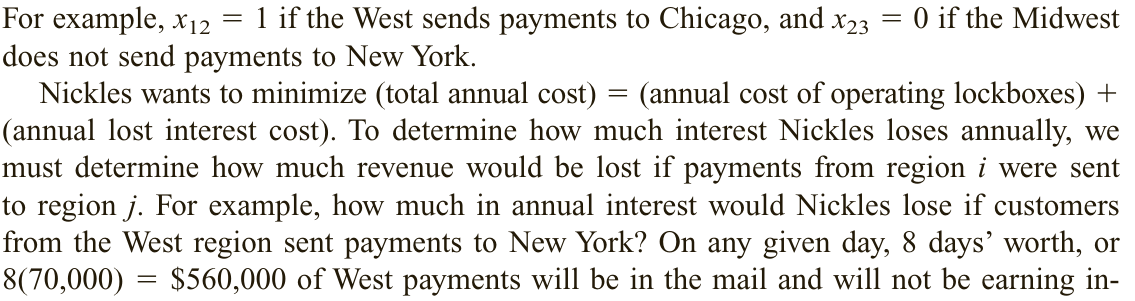

In [7]:
# Cost calculation detail: 
Image("cost-calculation-detail.png", width=500, height=450) 

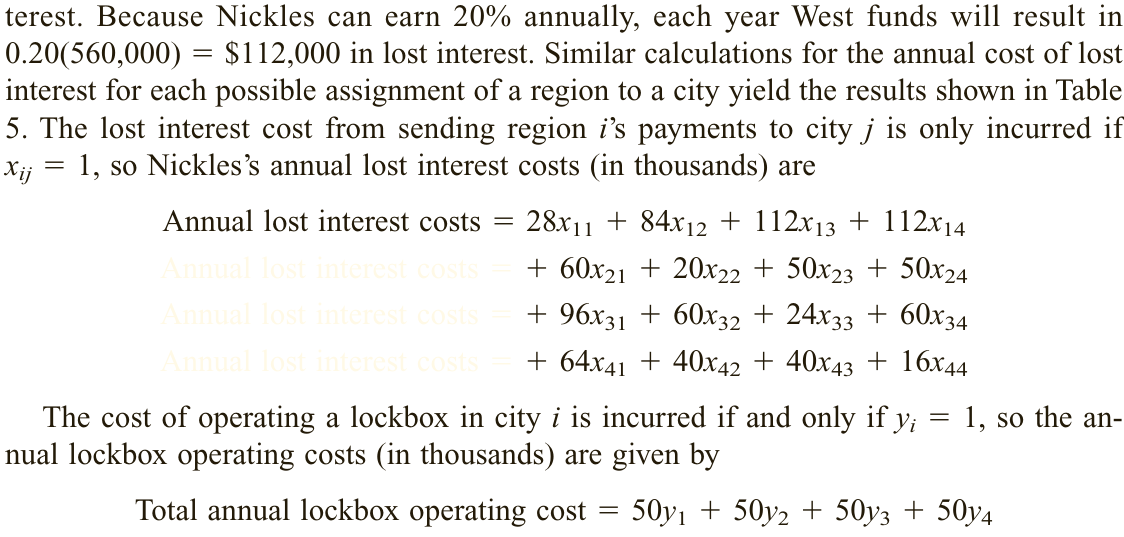

In [8]:
# Cost calculation detail: 
Image("cost-calculation-detail1.png", width=500, height=450) 

## Decision Variables
There are two types of decision variables in this problem. 
1. Nickels must decide where to operatate lockboxex, we define $j = {1, 2, 3, 4}$

\begin{equation}
y_j = \begin{cases}
1 & \text{if a lockbox is opened in city } j \\
0 & \text{otherwise}
\end{cases}
\end{equation}

2. Nickles must determine where each region of the country should send payments. We define (for $i, j = 1, 2, 3, 4$).

\begin{equation}
x_{ij} = \begin{cases}
1 & \text{if region $i$ sends payment to city } j \\
0 & \text{otherwise}
\end{cases}
\end{equation}

---------------------------------------

Nickels must decide where to operatate lockboxex, we define $j = {1, 2, 3, 4}$

\begin{equation}
y_j = \begin{cases}
1 & \text{if a lockbox is opened in city } j \\
0 & \text{otherwise}
\end{cases}
\end{equation}


In [9]:
# Method - 01: Define Variable (Binary- y_j)
# Loop through each city c to create a decision variable
# y_j = if a lockbox is opened in city j, 0 otherwise 
y = {}
for c in city:
    y[c] = m.addVar(vtype=GRB.BINARY, name = c)
m.update()
y

{'Los Angeles': <gurobi.Var Los Angeles>,
 'Chicago': <gurobi.Var Chicago>,
 'New York': <gurobi.Var New York>,
 'Atlanta': <gurobi.Var Atlanta>}

------------------------------------------------

Nickles must determine where each region of the country should send payments. We define (for $i, j = 1, 2, 3, 4$).

\begin{equation}
x_{ij} = \begin{cases}
1 & \text{if region $i$ sends payment to city } j \\
0 & \text{otherwise}
\end{cases}
\end{equation}

In [10]:
# Method - 01: Define Variable (Binary- x_ij)
# Loop through each r and c combination to create a decision variable
x = {}
for r in region:
    for c in city:
        x[r,c] = m.addVar(vtype=GRB.BINARY, name = r+"_to_"+c)
m.update()
x

{('West', 'Los Angeles'): <gurobi.Var West_to_Los Angeles>,
 ('West', 'Chicago'): <gurobi.Var West_to_Chicago>,
 ('West', 'New York'): <gurobi.Var West_to_New York>,
 ('West', 'Atlanta'): <gurobi.Var West_to_Atlanta>,
 ('Midwest', 'Los Angeles'): <gurobi.Var Midwest_to_Los Angeles>,
 ('Midwest', 'Chicago'): <gurobi.Var Midwest_to_Chicago>,
 ('Midwest', 'New York'): <gurobi.Var Midwest_to_New York>,
 ('Midwest', 'Atlanta'): <gurobi.Var Midwest_to_Atlanta>,
 ('East', 'Los Angeles'): <gurobi.Var East_to_Los Angeles>,
 ('East', 'Chicago'): <gurobi.Var East_to_Chicago>,
 ('East', 'New York'): <gurobi.Var East_to_New York>,
 ('East', 'Atlanta'): <gurobi.Var East_to_Atlanta>,
 ('South', 'Los Angeles'): <gurobi.Var South_to_Los Angeles>,
 ('South', 'Chicago'): <gurobi.Var South_to_Chicago>,
 ('South', 'New York'): <gurobi.Var South_to_New York>,
 ('South', 'Atlanta'): <gurobi.Var South_to_Atlanta>}

## Constraints
1. Type 1 Constraint: Each region must send its payments to a single city.

$$
\begin{align*}
\sum_{c}x_{rc} & = 1 &\forall r \in R \\
\end{align*}
$$

2. Type 2 Constraint: If a region is assigned to send its payments to a city, that city must have a lockbox.
$$
\begin{align*}
\sum_{r}x_{rc} &\le 4y_c &\forall c \in C \\
\end{align*}
$$


In [11]:
# Constraints
# Type 1 Constraint: Each region must send its payments to a single city.
c1 = m.addConstrs((gp.quicksum(x[r,c] for c in city) == 1 for r in region), "c1")
m.update()
c1

{'West': <gurobi.Constr c1[West]>,
 'Midwest': <gurobi.Constr c1[Midwest]>,
 'East': <gurobi.Constr c1[East]>,
 'South': <gurobi.Constr c1[South]>}

In [12]:
# Constraint 2: If a region is assigned to send its payments to a city, that city must have a lockbox.
c2 = m.addConstrs((gp.quicksum(x[r,c] for r in region)  <= 4.0 * y[c] for c in city), "c2")
m.update()
c2

{'Los Angeles': <gurobi.Constr c2[Los Angeles]>,
 'Chicago': <gurobi.Constr c2[Chicago]>,
 'New York': <gurobi.Constr c2[New York]>,
 'Atlanta': <gurobi.Constr c2[Atlanta]>}

### Objective Function

- **Minimize Cost**

\begin{equation}
\text{Minimize} \quad Z = \sum_{r,c}{\text{c}_{rc}\text{x}_{rc}}+
                           50\sum_{c}{\text{y}_{c}}
\end{equation}

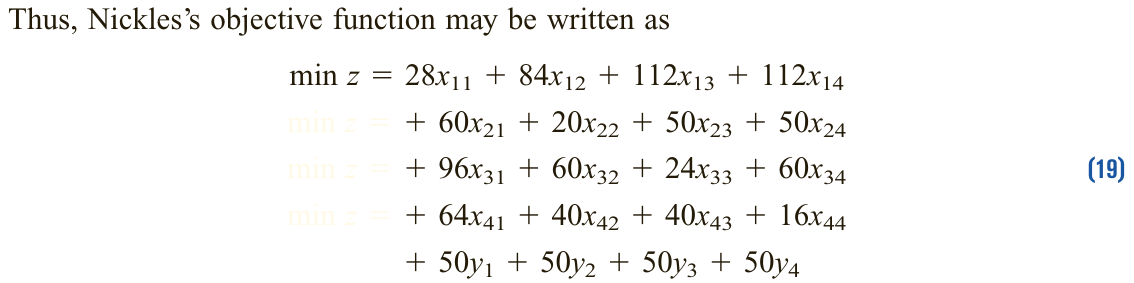

In [13]:
# Objective Function: 
Image("obj.png", width=500, height=400) 

In [14]:
# Set objective
m.setObjective(gp.quicksum(cost[r,c]*x[r,c] for r in region for c in city)+(gp.quicksum(opcost[c]*y[c] for c in city)),GRB.MINIMIZE)

In [15]:
# Update the model
m.update()

In [16]:
m.write('lockbox.lp')

In [17]:
# Optimize model
m.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Linux Mint 21.3")

CPU model: AMD Ryzen 5 5600G with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 20 columns and 36 nonzeros
Model fingerprint: 0xe8329dc8
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [2e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 350.0000000
Presolve time: 0.00s
Presolved: 8 rows, 20 columns, 36 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)
Found heuristic solution: objective 242.0000000

Root relaxation: objective 1.380000e+02, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0

In [18]:
# Print results
for v in m.getVars():
    print(f"{v.VarName} {v.X:g}")

print(f"Obj: {m.ObjVal:g}")

Los Angeles 1
Chicago 0
New York 1
Atlanta 0
West_to_Los Angeles 1
West_to_Chicago 0
West_to_New York 0
West_to_Atlanta 0
Midwest_to_Los Angeles 0
Midwest_to_Chicago 0
Midwest_to_New York 1
Midwest_to_Atlanta 0
East_to_Los Angeles 0
East_to_Chicago 0
East_to_New York 1
East_to_Atlanta 0
South_to_Los Angeles 0
South_to_Chicago 0
South_to_New York 1
South_to_Atlanta 0
Obj: 242


-------------------------------------